In [10]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from darts.datasets import AirPassengersDataset
from darts import TimeSeries
import warnings
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
# Import data using datetime and set index to datetime
df = pd.read_csv(r'C:\Users\91783\Desktop\DataSet\16_Varanasi\Book_16_1_PM.csv',
                                parse_dates=['Date'],
                                index_col=['Date'])

df.head()

,PM2.5
Date,
2021-01-01,69.618198
2021-02-01,133.945000
2021-03-01,77.412500
2021-04-01,104.205000
2021-05-01,151.360000


In [3]:
def convert2matrix(data_arr, look_back):
    X, Y =[], []
    for i in range(len(data_arr)-look_back):
        d=i+look_back  
        X.append(data_arr[i:d,])
        Y.append(data_arr[d,])
        return np.array(X), np.array(Y)

In [4]:

train_size = 300
train,test = df.values[0:train_size,:], df.values[train_size:len(df.values),:]
look_back = 30 #create window size as look_back=30
test = np.append(test,np.repeat(test[-1,], look_back))
train = np.append(train,np.repeat(train[-1,],look_back))
trainX,trainY =convert2matrix(train,look_back)
testX,testY =convert2matrix(test, look_back)
# reshape input to be [samples, window size, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [5]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint, EarlyStopping
def model_rnn(look_back):
    model=Sequential()
    model.add(SimpleRNN(units=32, input_shape=(1,look_back), activation="relu"))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',  optimizer='adam',metrics = ['mse', 'mae'])
    return model

In [6]:
model=model_rnn(look_back)

In [7]:
def call(c):
    history=model.fit(trainX,trainY, epochs=c, batch_size=8, verbose=2, validation_data=(testX,testY),callbacks=[EarlyStopping(monitor='val_loss', patience=10)],shuffle=False)

    def model_loss(history):
        plt.figure(figsize=(8,4))
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Test Loss')
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epochs')
        plt.legend(loc='upper right')
        plt.show();
        
        #Taking predictions
    Y_pred = model.predict(testX)
    from sklearn.metrics import mean_squared_error
    mse = mean_squared_error(testY, Y_pred)
    print('MSE')
    print(mse)
    rmse = np.sqrt(mse)
    print('RMSE')
    print(rmse)
    mae = np.mean(np.abs(testY, Y_pred))    # MAE
    print('MAE')
    print(mae)
    print('Y_pred')
    print(Y_pred)
    
    train_score = model.evaluate(trainX, trainY, verbose=0)
    print('Train Root Mean Squared Error(RMSE): %.2f; Train Mean Absolute Error(MAE) : %.2f ' 
    % (np.sqrt(train_score[1]), train_score[2]))
    test_score = model.evaluate(testX, testY, verbose=0)
    print('Test Root Mean Squared Error(RMSE): %.2f; Test Mean Absolute Error(MAE) : %.2f ' 
    % (np.sqrt(test_score[1]), test_score[2]))
    model_loss(history)

Epoch 1/10
1/1 - 2s - loss: 11648.9639 - mse: 11648.9639 - mae: 107.9304 - val_loss: 2006.1797 - val_mse: 2006.1797 - val_mae: 44.7904 - 2s/epoch - 2s/step
Epoch 2/10
1/1 - 0s - loss: 10324.6670 - mse: 10324.6670 - mae: 101.6104 - val_loss: 1768.4749 - val_mse: 1768.4749 - val_mae: 42.0532 - 30ms/epoch - 30ms/step
Epoch 3/10
1/1 - 0s - loss: 9169.2344 - mse: 9169.2344 - mae: 95.7561 - val_loss: 1554.7213 - val_mse: 1554.7213 - val_mae: 39.4300 - 18ms/epoch - 18ms/step
Epoch 4/10
1/1 - 0s - loss: 8079.6523 - mse: 8079.6523 - mae: 89.8869 - val_loss: 1360.1536 - val_mse: 1360.1536 - val_mae: 36.8803 - 8ms/epoch - 8ms/step
Epoch 5/10
1/1 - 0s - loss: 7062.0317 - mse: 7062.0317 - mae: 84.0359 - val_loss: 1265.8719 - val_mse: 1265.8719 - val_mae: 35.5791 - 31ms/epoch - 31ms/step
Epoch 6/10
1/1 - 0s - loss: 6566.7881 - mse: 6566.7881 - mae: 81.0357 - val_loss: 1189.0393 - val_mse: 1189.0393 - val_mae: 34.4824 - 16ms/epoch - 16ms/step
Epoch 7/10
1/1 - 0s - loss: 6247.0576 - mse: 6247.0576 - m

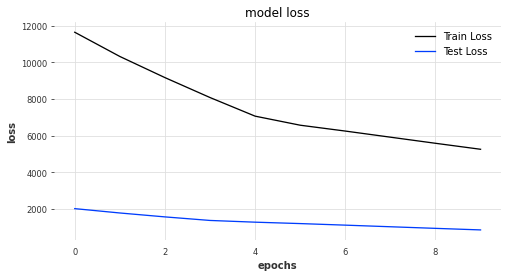

Epoch 1/20
1/1 - 0s - loss: 4933.5854 - mse: 4933.5854 - mae: 70.2395 - val_loss: 760.5675 - val_mse: 760.5675 - val_mae: 27.5784 - 31ms/epoch - 31ms/step
Epoch 2/20
1/1 - 0s - loss: 4627.4038 - mse: 4627.4038 - mae: 68.0250 - val_loss: 682.3845 - val_mse: 682.3845 - val_mae: 26.1225 - 31ms/epoch - 31ms/step
Epoch 3/20
1/1 - 0s - loss: 4333.5449 - mse: 4333.5449 - mae: 65.8297 - val_loss: 608.4686 - val_mse: 608.4686 - val_mae: 24.6672 - 16ms/epoch - 16ms/step
Epoch 4/20
1/1 - 0s - loss: 4052.4280 - mse: 4052.4280 - mae: 63.6587 - val_loss: 539.0396 - val_mse: 539.0396 - val_mae: 23.2172 - 16ms/epoch - 16ms/step
Epoch 5/20
1/1 - 0s - loss: 3710.4216 - mse: 3710.4216 - mae: 60.9132 - val_loss: 472.8812 - val_mse: 472.8812 - val_mae: 21.7458 - 31ms/epoch - 31ms/step
Epoch 6/20
1/1 - 0s - loss: 3297.0005 - mse: 3297.0005 - mae: 57.4195 - val_loss: 409.1807 - val_mse: 409.1807 - val_mae: 20.2282 - 16ms/epoch - 16ms/step
Epoch 7/20
1/1 - 0s - loss: 2881.9456 - mse: 2881.9456 - mae: 53.6838 

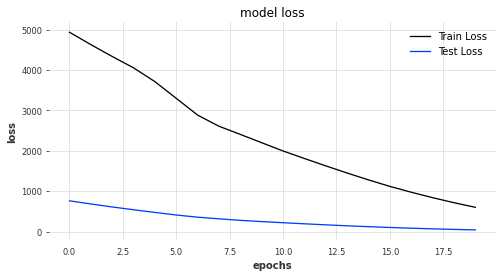

Epoch 1/30
1/1 - 0s - loss: 496.3315 - mse: 496.3315 - mae: 22.2785 - val_loss: 29.3311 - val_mse: 29.3311 - val_mae: 5.4158 - 47ms/epoch - 47ms/step
Epoch 2/30
1/1 - 0s - loss: 405.8432 - mse: 405.8432 - mae: 20.1455 - val_loss: 20.4320 - val_mse: 20.4320 - val_mae: 4.5202 - 16ms/epoch - 16ms/step
Epoch 3/30
1/1 - 0s - loss: 325.2059 - mse: 325.2059 - mae: 18.0335 - val_loss: 13.2649 - val_mse: 13.2649 - val_mae: 3.6421 - 31ms/epoch - 31ms/step
Epoch 4/30
1/1 - 0s - loss: 254.5218 - mse: 254.5218 - mae: 15.9537 - val_loss: 7.7568 - val_mse: 7.7568 - val_mae: 2.7851 - 16ms/epoch - 16ms/step
Epoch 5/30
1/1 - 0s - loss: 193.6692 - mse: 193.6692 - mae: 13.9165 - val_loss: 3.8123 - val_mse: 3.8123 - val_mae: 1.9525 - 16ms/epoch - 16ms/step
Epoch 6/30
1/1 - 0s - loss: 142.3586 - mse: 142.3586 - mae: 11.9314 - val_loss: 1.3170 - val_mse: 1.3170 - val_mae: 1.1476 - 31ms/epoch - 31ms/step
Epoch 7/30
1/1 - 0s - loss: 100.1561 - mse: 100.1561 - mae: 10.0078 - val_loss: 0.1397 - val_mse: 0.1397 -

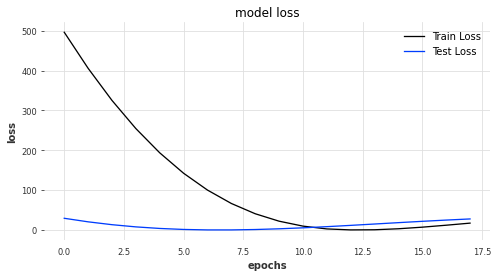

Epoch 1/40
1/1 - 0s - loss: 22.3392 - mse: 22.3392 - mae: 4.7264 - val_loss: 30.1969 - val_mse: 30.1969 - val_mae: 5.4952 - 96ms/epoch - 96ms/step
Epoch 2/40
1/1 - 0s - loss: 27.0893 - mse: 27.0893 - mae: 5.2047 - val_loss: 32.3089 - val_mse: 32.3089 - val_mae: 5.6841 - 31ms/epoch - 31ms/step
Epoch 3/40
1/1 - 0s - loss: 31.1716 - mse: 31.1716 - mae: 5.5832 - val_loss: 34.0010 - val_mse: 34.0010 - val_mae: 5.8310 - 16ms/epoch - 16ms/step
Epoch 4/40
1/1 - 0s - loss: 34.4062 - mse: 34.4062 - mae: 5.8657 - val_loss: 35.2626 - val_mse: 35.2626 - val_mae: 5.9382 - 47ms/epoch - 47ms/step
Epoch 5/40
1/1 - 0s - loss: 36.6885 - mse: 36.6885 - mae: 6.0571 - val_loss: 36.0982 - val_mse: 36.0982 - val_mae: 6.0082 - 16ms/epoch - 16ms/step
Epoch 6/40
1/1 - 0s - loss: 37.9826 - mse: 37.9826 - mae: 6.1630 - val_loss: 36.5250 - val_mse: 36.5250 - val_mae: 6.0436 - 31ms/epoch - 31ms/step
Epoch 7/40
1/1 - 0s - loss: 38.3101 - mse: 38.3101 - mae: 6.1895 - val_loss: 36.5711 - val_mse: 36.5711 - val_mae: 6.0

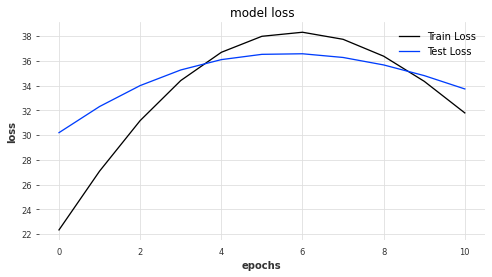

Epoch 1/50
1/1 - 0s - loss: 28.8610 - mse: 28.8610 - mae: 5.3722 - val_loss: 32.4833 - val_mse: 32.4833 - val_mae: 5.6994 - 78ms/epoch - 78ms/step
Epoch 2/50
1/1 - 0s - loss: 25.6944 - mse: 25.6944 - mae: 5.0690 - val_loss: 31.1114 - val_mse: 31.1114 - val_mae: 5.5778 - 16ms/epoch - 16ms/step
Epoch 3/50
1/1 - 0s - loss: 22.4255 - mse: 22.4255 - mae: 4.7356 - val_loss: 29.6538 - val_mse: 29.6538 - val_mae: 5.4455 - 16ms/epoch - 16ms/step
Epoch 4/50
1/1 - 0s - loss: 19.1726 - mse: 19.1726 - mae: 4.3787 - val_loss: 28.1469 - val_mse: 28.1469 - val_mae: 5.3054 - 28ms/epoch - 28ms/step
Epoch 5/50
1/1 - 0s - loss: 16.0366 - mse: 16.0366 - mae: 4.0046 - val_loss: 26.6233 - val_mse: 26.6233 - val_mae: 5.1598 - 18ms/epoch - 18ms/step
Epoch 6/50
1/1 - 0s - loss: 13.0987 - mse: 13.0987 - mae: 3.6192 - val_loss: 25.1105 - val_mse: 25.1105 - val_mae: 5.0110 - 31ms/epoch - 31ms/step
Epoch 7/50
1/1 - 0s - loss: 10.4209 - mse: 10.4209 - mae: 3.2281 - val_loss: 23.6321 - val_mse: 23.6321 - val_mae: 4.8

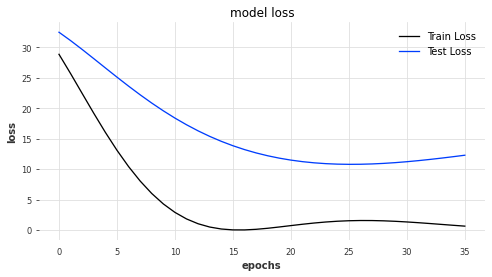

In [8]:
l=[10,20,30,40,50]
for i in l:
    call(i)

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4),dpi=80)
plt.scatter(testY,Y_pred)
plt.show()

NameError: name 'Y_pred' is not defined

<Figure size 320x320 with 0 Axes>